# Нейронные сети

### Литература 

- [Введение в NN от Себастьяна Рачки](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html)
- [CS231n - стенфордский курс](http://cs231n.github.io/)
- [DIY NN](http://neuralnetworksanddeeplearning.com/)
- [Книга о DNN](http://www.deeplearningbook.org/)
- [Минимизация ошибок в нейросетях](https://habrahabr.ru/post/318970/)
- [ML is fun](https://medium.com/@ageitgey/machine-learning-is-fun-part-2-a26a10b68df3)

**Практическая литература**
- [Google Tensorflow codelab](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/)
- [Оптимизаторы в тензорфлоу](https://www.tensorflow.org/api_guides/python/train#Optimizers)
- [Оптимизаторы в керас](https://keras.io/optimizers/)

### Библиотеки

- [Keras](https://keras.io/) 
- [Tensorflow](https://www.tensorflow.org/) 

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


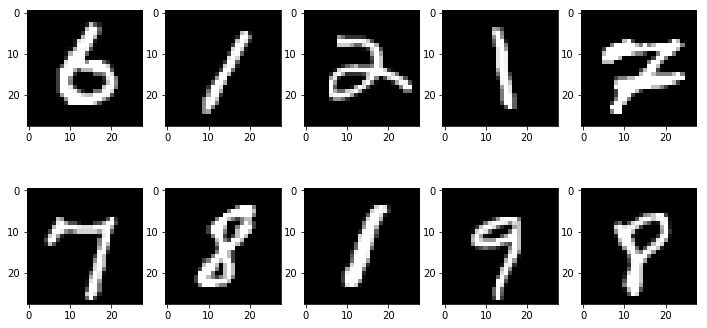

In [53]:
plt.figure(figsize=(12,6))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')

In [59]:
def draw(a, c):
    plt.figure(1, (15, 5))
    plt.subplot(121)
    plt.title('accuracy')
    plt.plot(a)

    plt.subplot(122)
    plt.title('cross_entropy')
    plt.plot(c)
    plt.show()

## Однослойная нейросеть

![](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/d5222c6e3d15770a.png)

In [48]:
# В Tensorflow не вычисляют напрямую значения, а описывают **граф** выполнения. 
# То есть это как в excel - мы записываем формулы ячеек.

X = tf.placeholder(tf.float32, [None, 784], name='X')
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [54]:
# Модель Y = softmax(X.W + b)
Y = tf.nn.softmax(tf.matmul(
    tf.reshape(X, [-1, 784]), W) + b)

# Подстановка для корректных значений входных данных
Y_ = tf.placeholder(tf.float32, [None, 10])

In [55]:
# Функция потерь H = Sum(Y_ * log(Y))
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

In [8]:
# доля корректных ответов
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
# точность предсказания
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
# Оптимизируем функцию потерь меотодом градиентного спуска
# 0.003 - это шаг градиента, гиперпараметр
optimizer = tf.train.GradientDescentOptimizer(0.003)

# Минимизируем потери
train_step = optimizer.minimize(cross_entropy)

In [27]:
# инициализация сессии
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

acc, entropy = [], []  # переменные для рисования графиков

for i in range(1000):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict=train_data)
    
    if i % 10 == 0:
        test_data={X: mnist.test.images, Y_: mnist.test.labels}
        a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        acc.append(a)
        entropy.append(c)

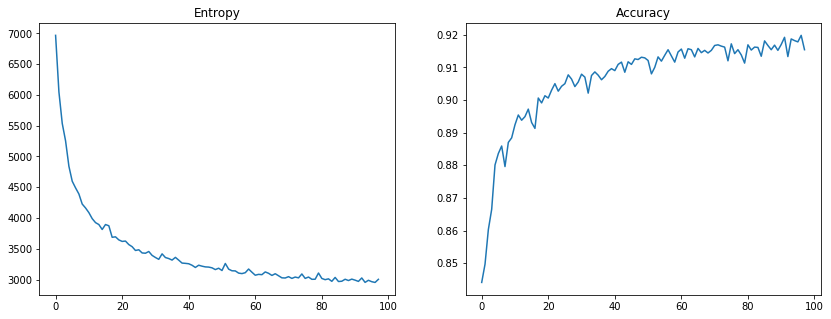

In [46]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(entropy[2:])  # смещение, так как не интересно смотреть на первые шаги с 0 точностью
plt.title('Entropy')
plt.subplot(1,2,2)
plt.plot(acc[2:])  # смещение, так как не интересно смотреть на первые шаги с 0 точностью
plt.title('Accuracy')
print()

## Глубокая нейросеть

### sigmoid + softmax + 5 layers

![](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/77bc41f211c9fb29.png)

In [57]:
tf.reset_default_graph()

layer_sizes = [28*28, 200, 100, 60, 30, 10]

W1 = tf.Variable(tf.truncated_normal([layer_sizes[0], layer_sizes[1]], stddev=0.1))
B1 = tf.Variable(tf.zeros(layer_sizes[1])) # 200

W2 = tf.Variable(tf.truncated_normal([layer_sizes[1], layer_sizes[2]], stddev=0.1))
B2 = tf.Variable(tf.zeros(layer_sizes[2])) # 100

W3 = tf.Variable(tf.truncated_normal([layer_sizes[2], layer_sizes[3]], stddev=0.1))
B3 = tf.Variable(tf.zeros(layer_sizes[3])) # 60

W4 = tf.Variable(tf.truncated_normal([layer_sizes[3], layer_sizes[4]], stddev=0.1))
B4 = tf.Variable(tf.zeros(layer_sizes[4])) # 30

W5 = tf.Variable(tf.truncated_normal([layer_sizes[4], layer_sizes[5]], stddev=0.1))
B5 = tf.Variable(tf.zeros(layer_sizes[5])) # 10

In [58]:
X =  tf.placeholder(tf.float32, [None, 784])

Y1 = tf.nn.sigmoid(tf.matmul(X, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)

Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)
Y_ = tf.placeholder(tf.float32, [None, 10])

Test: 0.10279999673366547, 232.05328369140625
Test: 0.6396999955177307, 138.75218200683594
Test: 0.7900999784469604, 80.64254760742188
Test: 0.8465999960899353, 52.242069244384766
Test: 0.9160000085830688, 36.708251953125
Test: 0.9351999759674072, 27.888044357299805
Test: 0.9372000098228455, 25.063457489013672
Test: 0.9480999708175659, 20.81377410888672
Test: 0.9526000022888184, 18.62466049194336
Test: 0.9520000219345093, 18.448204040527344


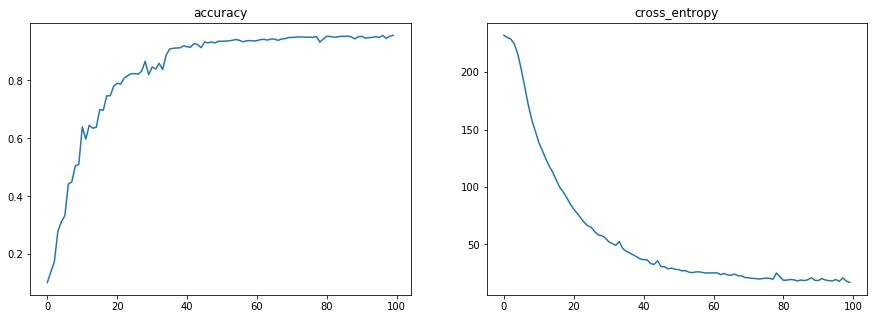

In [62]:
epoches=1000

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)  # это просто сокращенная запись для sum(y*log(y_))
cross_entropy = tf.reduce_mean(cross_entropy)*100

is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

learning_rate=0.003
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(cross_entropy)

accuracy_vis, cross_entropy_vis = [], []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(epoches):
        batch_X, batch_Y = mnist.train.next_batch(100)
        train_data={X: batch_X, Y_: batch_Y}

        # train
        sess.run(train_step, feed_dict=train_data)

        if i % 10 == 0:
            test_data={X: mnist.test.images, Y_: mnist.test.labels}
            a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            accuracy_vis.append(a)
            cross_entropy_vis.append(c)
            if i % 100 == 0:
                print("Test: {}, {}".format(a, c))

draw(accuracy_vis, cross_entropy_vis)

**sigmoid + softmax + 5 layers**

- Качество классификации: 0.94
- Медленно сходится
- Есть резкие перепады при обучении
- Нужна другая функция активации

### Relu = Rectified Linear Unit

![](https://github.com/mlomsk/ML_MNIST_Workshop_2017-09-28/raw/daac65645d85c8171c0679f34e5a5b97a97a6a79/images/relu.png)